## Gaussian Process Modeling: The *Other* AI For Science

- Gaussian Processes (GPs) are one of the oldest types of "AI", dating to the work of Wiener and Kolmogorov in the 1940s.  

- Best reference on the subject: Rasmussen & Williams, *Gaussian Processes for Machine Learning*, (The MIT Press, 2006). Available online at <http://gaussianprocess.org/gpml/chapters/>

- A Gaussian process can be thought of as a multi-variate normal distribution in an infinite-dimensional space of functions (e.g. a Hilbert space, Fourier space...). Essentially a "probability distribution over functions."     

- This seemingly harmless generalization has surprising super-powers.  For example, given sample values from an unknown function, a GP can be trained to give an updated distribution over functions that captures information from the data!  

- Moreover, the updated GP can make *probabilistic predictions* about values of the function at new, unsampled locations!

- GPs come with well-developed mathematical theory, and no interpretability issues.  

- And rumors of their death due to unsuitability for big data applications have been greatly exaggerated...

---

### Some Introduction and (Hopefully) Intuitions

- To gain some intuition on how GPs can be used for these kinds of tricks, recall first the definition of the probability density function (pdf) of a finite-dimensional multivariate normal distribution. 

- In $D$ dimensions, the pdf is completely defined by

  - a $D$-dimensional mean vector $x_0$;
  - a $D\times D$-dimensional symmetric, positive-definite (SPD) covariance matrix $C$.  
  
- The pdf is then given by $\pi(x)=(2\pi)^{-D/2}[\mathrm{Det}C]^{-1/2}\exp\left\{-\frac{1}{2}(x-x_0)^TC^{-1}(x-x_0)\right\}$.

In the case $D=2$, we might visualize the density as follows:

<center>
<img src="figures/normal_2d_1_annotated.png" width=600>
</center>

- Now, suppose that we made an observation of the value of the coordinate $x_2$, fixing its value, without gaining knowledge of $x_1$. We would depict the situation as follows:

<center>
<img src="figures/normal_2d_2_annotated.png" width=600>
</center>

- What does this imply for the distribution of $x_1$---that is, for the *conditional* probability distribution with density $\pi(x_1|x_2)$? Here is the appropriate picture:

<center>
<img src="figures/normal_2d_3_annotated.png" width=600>
</center>
- The measurement of $x_2$ has *shifted* the mean value of $x_1$ from its prior value, and shrunk the variance of $x_1$ (by adding *information*). Both changes are computable in closed form.

- This is a silly example, helpful for visualization. The similar basic observations apply if (say)

  - $D$ is large but finite, we partition coordinates $(x_1,x_2,\ldots,x_D)$ into disjoint two sets $x_o$ of dimension $D_o$, $x_i$ of dimension $D_i$ ($D_o+D_i=D$); we observe $x_o$ but not $x_i$, and we compute $\pi(x_i|x_o)$, or the distribution of any subset of the $x_i$; 

  - Same, but more generally we observe $D_o$ *linear functions* $l_o(x)$ of the $x$ and compute $\pi(x_i|l_o)$ (or again the distribution of any subset of the $x_i$); 

  - The GP case: in effect, "$D\rightarrow\infty$" with $D_o$ remaining finite. In this case we can compute the distributions $\pi(x_j|l_o)$ of any finite subset of variables $x_j$.

---

#### Hyperparameter Optimization

- Now, suppose you have measured the values of the functions $l_o(x)$, and wish to set out to make the probabilistic estimates $\pi(x_j|l_o)$ in any of the cases above. But you don't necessarily know the right mean $x_0$ and covariance $C$. How do you proceed?

- One way is to choose a parametrized form form for the mean and covariance, $x_0(\theta)$, $C(\theta)$, where $\theta$ is a set of parameters. Then you can maximize the *log-likelihood function* (Log probability of the data $l_o$ given the parametrized model) with respect to $\theta$ to obtain the *maximum likelihood estimate* (MLE) of $\theta$.

- In the GP case, the parameters $\theta$ are usually referred to as "hyperparameters", to distinguish them from parameters of finite regression models. This usage of the term "hyperparameter" is somewhat different from the common usage in Artificial Neural Networks.

---

#### Weren't We Supposed To Be Modeling Functions?

- But what has any of this algebraic nonsense to do with modeling *functions*?

- Recall that the prime example of an infinite-dimensional vector space is the space of *Fourier analysis*.

- Imagine that the basis vectors multiplying our coefficient vectors $x=(x_1, x_2,\ldots)$ are Fourier modes, such as sines and/or cosines $\sin(2\pi lt)$, $\cos(2\pi lt)$ of frequency harmonics, e.g. in a Fourier expansion of a function $f(t)$. In fact, the $D_o$ linear functions $l_o(x)$ might be the Fourier series of $f(t)$ at a set of particular values of $t=t_m$, $m=1,\ldots,D_o$, e.g.:
\begin{equation}
l_{o,m}=\sum_l \left[x_l^{s}\times \sin(2\pi l t_m)+x_l^c\times\cos(2\pi lt_m)\right]=f(t_m).\nonumber
\end{equation}

- In this view, "training on the $l_o$" becomes "training on observed values of the function $f(t_m)$", and "computing the conditional distribution $\pi(x_j|l_o)$" becomes "*computing the posterior predictive distribution of the function $f(t)$ at as-yet unobserved locations $t$*".

- The latter includes operation produces a *normal distribution* on the value of $f(t)$, with a *predictive mean* 
\begin{equation}
\overline{f}(t)=E\left[f(t)\ |\ f(t_1),\ldots,f(t_{D_o})\right]\nonumber
\end{equation}
 and a *predictive variance*
 
 \begin{equation}
 \mathrm{Var}[f(t)]=E\left[(f(t)-\overline{f}(t))^2\ |\ f(t_1),\ldots,f(t_{D_o})\right].\nonumber
 \end{equation}
 These are available in closed form.

- If multiple predictions $t_1, t_2,\ldots, t_P$ are made simultaneously one has a $P$-dimensional *predictive mean vector* $\overline{F}$ with components
\begin{equation}
\overline{F}_p=E\left[f(t_p)\ |\ f(t_1),\ldots,f(t_{D_o})\right],\nonumber
\end{equation}
and a $P\times P$ dimensional *predictive covariance matrix* $C$ with components
\begin{equation}
C_{pp^\prime}=E\left\{\left[f(t_p)-\overline{f}(t_p)\right]\left[f(t_p^\prime)-\overline{f}(t_p^\prime)\right]\right\},\nonumber
\end{equation}
 also in closed form. 

- This is what is called **Gaussian Process Regression**. It is frequently used for interpolation, extrapolation, forecasting, data assimilation, and many, many other types of applications.

---

### GPs In Practice

- In practice, a GP is specified analogously to a finite-dimensional multivariate normal distribution. Assuming some continuous $N$-dimensional space $S$ (often---but not necessarily---$\mathbb{R}^N$) one must specify

  - A *mean function* $m(z)$, $m:S\mapsto\mathbb{R}$;

  - A *covariance function* $K(z,z^\prime)$, $K: S\times S\mapsto\mathbb{R}$, where $K(\cdot,\cdot)$ is symmetric and positive-definite (SPD) as an integral kernel.

- While the SPD requirement may seem restrictive, it is not.  In fact covariance kernel choice is one of the factors that gives GP modeling its power.  By a judicious choice one may choose kernels that induce distributions over modeling function families by

  - smoothness / differentiability

  - scale lengths

  - uniformity of properties in $S$ or lack thereof

  - topological properties

  - sparseness-inducing properties

  - mixing and matching

- A great advantage of GP modeling is that the mathematical foundations of the theory are quite transparent, so that GP models have very good interpretability properties.

- Until very recently, the great *disadvantage* of GP-based methods was a "curse of dimensionality" problem, associated with an $N^3$ scaling of the linear solves required for modeling $N$ data points. This seemed to put GPs out of the Big Data leagues.

- Modern fast kernel approximation methods have solved this problem, resulting in $N^0$ (!) scaling, and HPC-ready implementations with GPU acceleration. 

- We are rolling out such a library at ALCF as we speak: *GPyTorch*

----

### GP Regression/Prediction Example Using GPyTorch

Here's an example of GP regression adapted from the [GPyTorch Regression Tutorial](https://docs.gpytorch.ai/en/latest/examples/01_Exact_GPs/Simple_GP_Regression.html).  

As in that tutorial, we start with necessary module imports (PyTorch, GPyTorch, math, and MatPlotLib), and set up some data. We’ll be using 100 regularly spaced points on [0,1] which we evaluate the function on and add Gaussian noise to get the training labels.


In [3]:
import torch
import gpytorch
import math
from matplotlib import pyplot as plt

# Training data is 100 points in [0,1] inclusive regularly spaced
train_x = torch.linspace(0, 1, 100)
# True function is sin(2*pi*x) with Gaussian noise
train_y = torch.sin(train_x * (2 * math.pi)) + torch.randn(train_x.size()) * math.sqrt(0.04)

Next, we set up the model and likelihood. 

What this section is doing is choosing a covariance kernel function (the "RBF" kernel, more properly referred to as the "squared-exponential" covariance function) and a mean function (a constant, adjustable mean). In addition, the "likelihood" part takes care of modeling the noise that is added to the data.

The GPyTorch API is a bit complicated, and requires some knowledge of GP theory to explain, so please consult the full tutorial and the library documentation for more details on why it's done this way.

In [4]:
# We will use the simplest form of GP model, exact inference
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ExactGPModel(train_x, train_y, likelihood)


### Training The Model

Here "training" means adjusting the hyperparameters to maximize the likelihood, that is, to obtain the MLE estimate of the hyperparameters.  Prediction at unobserved points by conditioning on observed data is a separate sense of the term "training". In GP modeling, the latter usually follows the former.

Training follows a similar paradigm to ANN training, and in particular has the same basic components as the standard PyTorch training loop:

1. Zero all parameter gradients

2. Call the model and compute the loss

3. Call backward on the loss to fill in gradients

4. Take an optimizer step


In [5]:
training_iter = 50

# Find optimal model hyperparameters
model.train()
likelihood.train()

# Use the adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  # Includes GaussianLikelihood parameters

# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(training_iter):
    # Zero gradients from previous iteration
    optimizer.zero_grad()
    # Output from model
    output = model(train_x)
    # Calc loss and backprop gradients
    loss = -mll(output, train_y)
    loss.backward()
    print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (
        i + 1, training_iter, loss.item(),
        model.covar_module.base_kernel.lengthscale.item(),
        model.likelihood.noise.item()
    ))
    optimizer.step()

Iter 1/50 - Loss: 0.938   lengthscale: 0.693   noise: 0.693
Iter 2/50 - Loss: 0.906   lengthscale: 0.644   noise: 0.644
Iter 3/50 - Loss: 0.872   lengthscale: 0.598   noise: 0.598
Iter 4/50 - Loss: 0.835   lengthscale: 0.555   noise: 0.554
Iter 5/50 - Loss: 0.792   lengthscale: 0.514   noise: 0.513
Iter 6/50 - Loss: 0.744   lengthscale: 0.476   noise: 0.474
Iter 7/50 - Loss: 0.692   lengthscale: 0.439   noise: 0.437
Iter 8/50 - Loss: 0.639   lengthscale: 0.405   noise: 0.402
Iter 9/50 - Loss: 0.588   lengthscale: 0.372   noise: 0.369
Iter 10/50 - Loss: 0.541   lengthscale: 0.342   noise: 0.339
Iter 11/50 - Loss: 0.499   lengthscale: 0.315   noise: 0.310
Iter 12/50 - Loss: 0.460   lengthscale: 0.292   noise: 0.284
Iter 13/50 - Loss: 0.424   lengthscale: 0.272   noise: 0.259
Iter 14/50 - Loss: 0.389   lengthscale: 0.255   noise: 0.236
Iter 15/50 - Loss: 0.355   lengthscale: 0.242   noise: 0.215
Iter 16/50 - Loss: 0.320   lengthscale: 0.232   noise: 0.196
Iter 17/50 - Loss: 0.287   length

Note that we added a noise term of size 0.04 to the data, so the GP fit estimated this pretty well from the data itself. The 'lengthscale' represents the characteristic length on which the function changes. The function is $\sin(2\pi x)$, so the length scale should be about $1/4$ (a quarter wavelength). We could probably have gone on training a bit. But life is short...

### Model Predictions

Let's see what the character of a GP prediction looks like.  

We'll make a set of test points at which we will request the predictive distribution of the function, and we'll plot that distribution, including it's uncertainty. We will include both points inside the support of the training set *and* points outside of it, to test both interpolation and extrapolation properties.

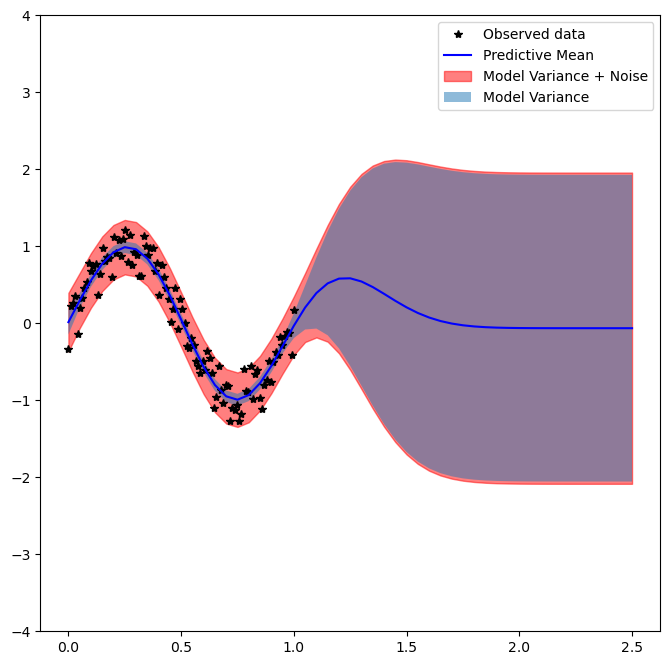

In [6]:
# The training set was x \in [0,1]
#
test_x = torch.linspace(0, 2.5, 51)

model.eval()
likelihood.eval()

with torch.no_grad():
    f_preds = model(test_x)
    obs_preds = likelihood(f_preds)
    lower_f, upper_f = f_preds.confidence_region()
    lower_o, upper_o = obs_preds.confidence_region()

fig = plt.figure()
fig.set_figwidth(8.0)
fig.set_figheight(8.0)
ax = fig.add_subplot(1,1,1)

# Plot training data as black stars
ax.plot(train_x.numpy(), train_y.numpy(), 'k*', label="Observed data")
# Plot predictive means as blue line
ax.plot(test_x.numpy(), f_preds.mean.numpy(), 'b', label="Predictive Mean")
# Shade between the lower and upper confidence bounds of model+noise
ax.fill_between(test_x.numpy(), lower_o.numpy(), upper_o.numpy(), color="r", alpha=0.5, label="Model Variance + Noise")
# Shade between the lower and upper confidence bounds of model
ax.fill_between(test_x.numpy(), lower_f.numpy(), upper_f.numpy(), alpha=0.5, label="Model Variance")
ax.set_ylim([-4, 4])
l=ax.legend()


- The blue line is the mean of the prediction. 

- The blue inner "snake" represents the variance (diagonal elements of the covariance) of the so-called "latent" predictive distribution --- that is, the distribution that one would see if it were possible to strip away the noise and see the underlying process. Often this is what is really of interest, and one models the noise so as to get rid of it. 

- The pink snake is the compound of the model and noise uncertainty.  The bounds represent a 90% confidence interval.

- To the right, we see another property of GP modeling: the model is honest about what it knows. As it leaves the region where the training data is supported, the uncertainty grows until it saturates at a "prior" value given by the current hyperparameter settings. 

- As it departs from the data, the GP model is willing to say no more than what it learned from the overall variability that it witnessed in the training regime.  It is not overconfident.

### Conclusions

- GP modeling has been around for a while, and provides a powerful framework for modeling data in terms of underlying spaces of functions.

- What is new is the possibility of using GPs at HPC scales. This is going to start happening at Argonne this year, on Polaris, and next year, on Aurora.

- Watch This Space.